# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("2881.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5329 entries, 2001-12-20 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5329 non-null   float64
 1   High                       5329 non-null   float64
 2   Low                        5329 non-null   float64
 3   Close                      5329 non-null   float64
 4   Volume                     5329 non-null   int64  
 5   Dividends                  5329 non-null   float64
 6   Stock Splits               5329 non-null   float64
 7   volume_adi                 5326 non-null   float64
 8   volume_obv                 5329 non-null   int64  
 9   volume_cmf                 5250 non-null   float64
 10  volume_fi                  5316 non-null   float64
 11  volume_em                  5260 non-null   float64
 12  volume_sma_em              4703 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                Open       High        Low      Close   
Date                                                                    
2001-12-20 00:00:00+08:00  11.221226  11.254327  10.625409  10.790914  \
2001-12-21 00:00:00+08:00  10.426805  10.956420  10.261299  10.360602   
2001-12-24 00:00:00+08:00  10.426805  10.526107   9.930290   9.930290   
2001-12-25 00:00:00+08:00   9.996490  10.459903   9.996490  10.393702   
2001-12-26 00:00:00+08:00  10.393704  10.459905   9.963391  10.062694   
...                              ...        ...        ...        ...   
2023-05-29 00:00:00+08:00  61.000000  61.599998  60.799999  61.099998   
2023-05-30 00:00:00+08:00  61.200001  61.599998  60.799999  60.799999   
2023-05-31 00:00:00+08:00  60.700001  61.400002  60.700001  60.799999   
2023-06-01 00:00:00+08:00  60.700001  61.000000  60.000000  60.400002   
2023-06-02 00:00:00+08:00  60.500000  60.900002  60.400002  60.700001   

                             Volume  trend_macd_di

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5329 entries, 2001-12-20 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5329 non-null   float64
 1   High             5329 non-null   float64
 2   Low              5329 non-null   float64
 3   Close            5329 non-null   float64
 4   Volume           5329 non-null   int64  
 5   trend_macd_diff  5296 non-null   float64
 6   trend_ema_fast   5318 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 333.1 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date       Open       High   
Date                                                                        
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  68.549712  68.639319  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  67.743248  67.922462   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  67.384812  68.012062   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  67.832848  68.012062   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  68.012062  68.639312   
...                                             ...        ...        ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  60.000000  61.099998   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  60.599998  60.599998   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  59.500000  60.099998   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  60.099998  60.200001   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00  59.700001  60.000000   

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,55.500000,56.000000,55.000000,55.900002,8351750,0.252248,54.746578,85.964928,66.703171
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,56.000000,57.400002,55.799999,57.099998,18435414,0.278207,55.108643,95.238049,71.387145
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,57.400002,57.799999,57.099998,57.700001,15307720,0.308500,55.507313,98.333359,73.401889
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,57.700001,58.200001,57.200001,57.900002,21099463,0.313690,55.875419,94.642873,74.057629
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,57.500000,58.400002,56.799999,57.900002,19388016,0.289395,56.186893,91.071432,74.057629
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,58.000000,59.599998,57.299999,59.599998,25259384,0.355724,56.711986,100.000000,79.129795
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,59.500000,61.000000,59.000000,60.799999,37854298,0.442657,57.340911,97.222212,81.830326
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,61.099998,61.599998,60.200001,60.400002,19648582,0.434831,57.811541,83.098631,78.198049
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,59.500000,60.599998,59.500000,60.099998,11210450,0.373412,58.163611,78.873235,75.491502


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 60, 'C': 0.1, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=0.1)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[56.13041074 56.02697376 56.09933751 55.52057999 55.70622524 55.38148097
 55.46806632 55.22816521 55.36699523 55.45419081 55.95065677 55.94159991
 55.7538857  55.87856191 55.62557844 56.0544918  55.22369468 55.90338659
 55.96762817 56.10808823 55.17672365 55.696197   55.3944197  55.84886176
 55.99900535 56.17784789 56.28013037 56.24189171 56.10250935 56.09163511
 56.19997778 56.13813579 56.10430558 55.6846862  56.11660993 55.4500718
 55.88459997 55.89828142 56.05686742 56.10926958 55.84834922 55.49717577
 55.28417498 55.27233086 55.50675826 55.45008137 56.00896141 55.65087868
 55.93425272 55.88709839 56.23043149 56.09433146 55.96077422 55.88192921
 55.89154911 56.10359656 55.9068824  56.00278362 56.1782336  55.85318866
 55.98570624 55.87100312]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5265 2023-03-01 00:00:00+08:00        56.130411
5266 2023-03-02 00:00:00+08:00        56.026974
5267 2023-03-03 00:00:00+08:00        56.099338
5268 2023-03-06 00:00:00+08:00        55.520580
5269 2023-03-07 00:00:00+08:00        55.706225
...                        ...              ...
5322 2023-05-25 00:00:00+08:00        56.002784
5323 2023-05-26 00:00:00+08:00        56.178234
5324 2023-05-29 00:00:00+08:00        55.853189
5325 2023-05-30 00:00:00+08:00        55.985706
5326 2023-05-31 00:00:00+08:00        55.871003

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-29 00:00:00+08:00
最低值： 55.1767236523932
最高值日期： 2023-04-11 00:00:00+08:00
最高值： 56.28013036863968


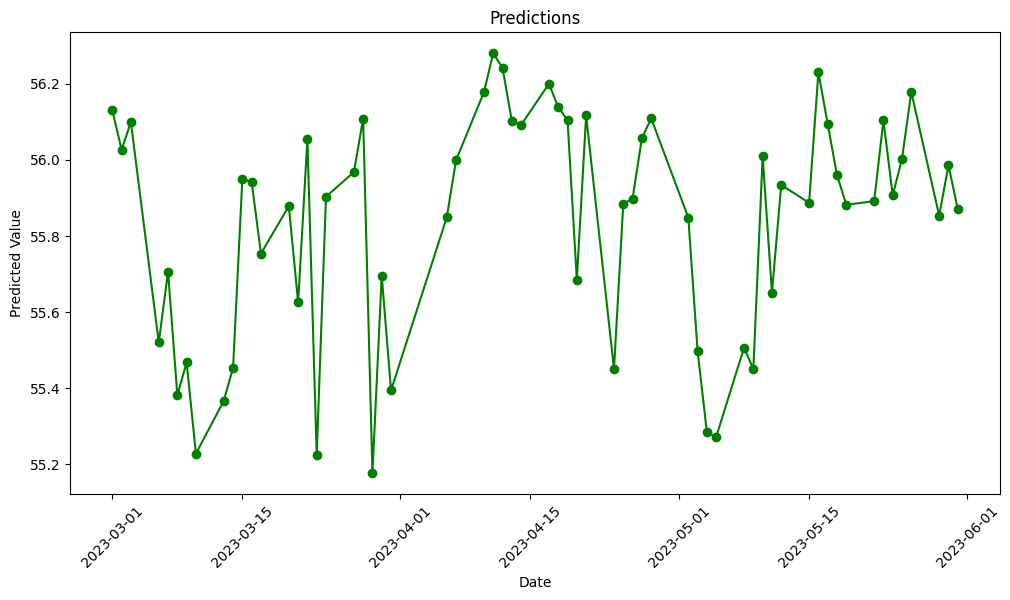

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

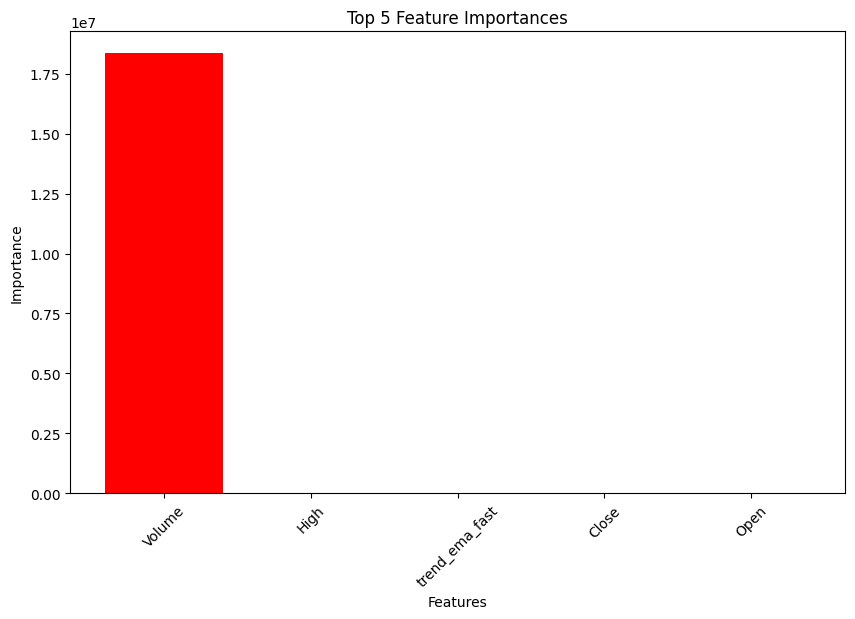

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 95, 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 4}
最佳相对误差: 0.011822535038500684 %


RandomForestRegressor(max_depth=4, min_samples_leaf=4, n_estimators=200,
                      random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[55.39060503 55.39811915 55.92736674 57.16292304 57.42116226 57.63046686
 57.6374248  59.35757027 60.51095772 60.50420425 60.11504547 59.24586562
 58.46871074 58.12021693 57.16554105 57.36297039 57.34597753 57.40388064
 57.44666181 57.2222966  56.24972069 56.62906513 56.36392704 56.37140631
 56.74404917 56.65980642 56.74867549 57.16292304 56.66409496 56.00743536
 56.45484363 56.50821031 57.17153433 58.4151242  58.45213813 59.4946176
 59.23201728 58.00042628 58.88457553 58.75578122 59.35970648 59.88006347
 60.57977754 60.2124646  60.06095382 60.50488819 59.89293739 59.37640181
 59.38774543 59.22841919 59.14891573 58.92026099 59.37962593 60.09052764
 59.41347136 59.3864739  60.23922136 60.54523211 60.16211205 59.98838536
 59.89013935 60.04731115]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5265 2023-03-01 00:00:00+08:00       55.390605
5266 2023-03-02 00:00:00+08:00       55.398119
5267 2023-03-03 00:00:00+08:00       55.927367
5268 2023-03-06 00:00:00+08:00       57.162923
5269 2023-03-07 00:00:00+08:00       57.421162
...                        ...             ...
5322 2023-05-25 00:00:00+08:00       60.545232
5323 2023-05-26 00:00:00+08:00       60.162112
5324 2023-05-29 00:00:00+08:00       59.988385
5325 2023-05-30 00:00:00+08:00       59.890139
5326 2023-05-31 00:00:00+08:00       60.047311

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-03-01 00:00:00+08:00
最低值： 55.390605030733155
最高值日期： 2023-05-04 00:00:00+08:00
最高值： 60.579777539824065


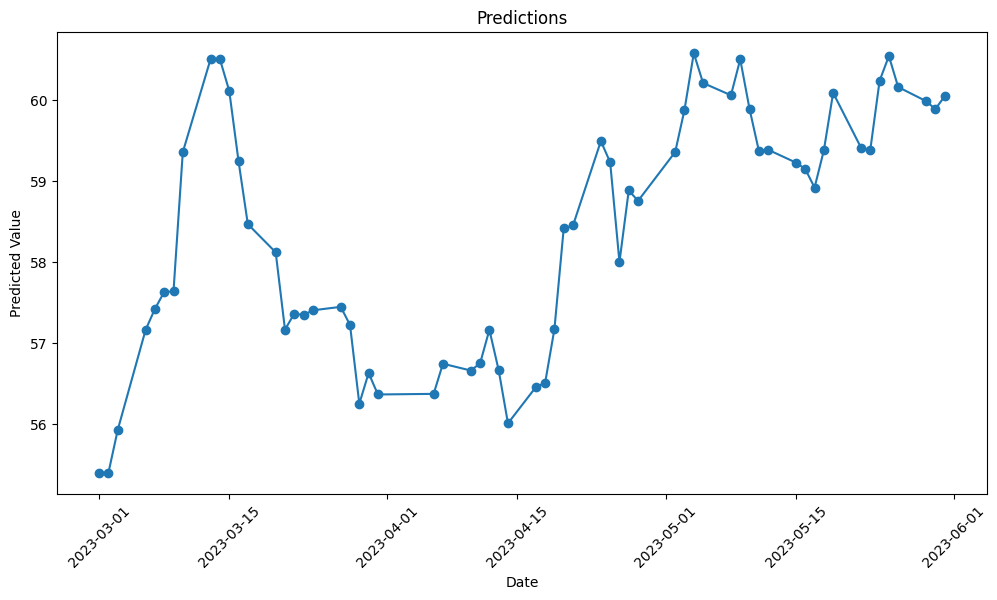

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



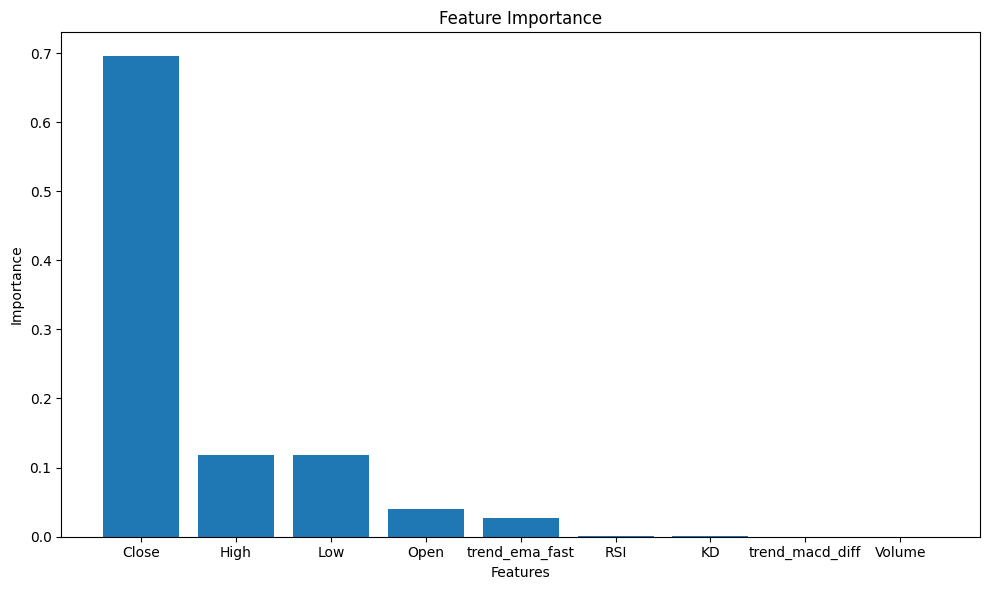

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[35.15621  35.15621  35.43236  36.10464  36.37594  36.548405 36.548405
 37.661434 37.966484 37.826775 37.774258 37.557415 36.98402  36.8009
 36.10464  36.261093 36.261093 36.32717  36.261093 36.10464  35.562374
 35.909008 35.62647  35.62647  35.96642  35.96642  35.96642  36.10464
 35.96642  35.497036 35.672077 35.73521  36.10464  37.04378  37.04378
 37.661434 37.557415 36.73798  37.334583 37.21928  37.607067 37.721806
 38.04348  37.774258 37.774258 37.826775 37.721806 37.607067 37.607067
 37.557415 37.502415 37.334583 37.607067 37.774258 37.607067 37.607067
 37.774258 37.966484 37.774258 37.774258 37.721806 37.774258]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5265 2023-03-01 00:00:00+08:00       35.156212
5266 2023-03-02 00:00:00+08:00       35.156212
5267 2023-03-03 00:00:00+08:00       35.432362
5268 2023-03-06 00:00:00+08:00       36.104641
5269 2023-03-07 00:00:00+08:00       36.375938
...                        ...             ...
5322 2023-05-25 00:00:00+08:00       37.966484
5323 2023-05-26 00:00:00+08:00       37.774258
5324 2023-05-29 00:00:00+08:00       37.774258
5325 2023-05-30 00:00:00+08:00       37.721806
5326 2023-05-31 00:00:00+08:00       37.774258

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-01 00:00:00+08:00
最低值： 35.15621
最高值日期： 2023-05-04 00:00:00+08:00
最高值： 38.04348


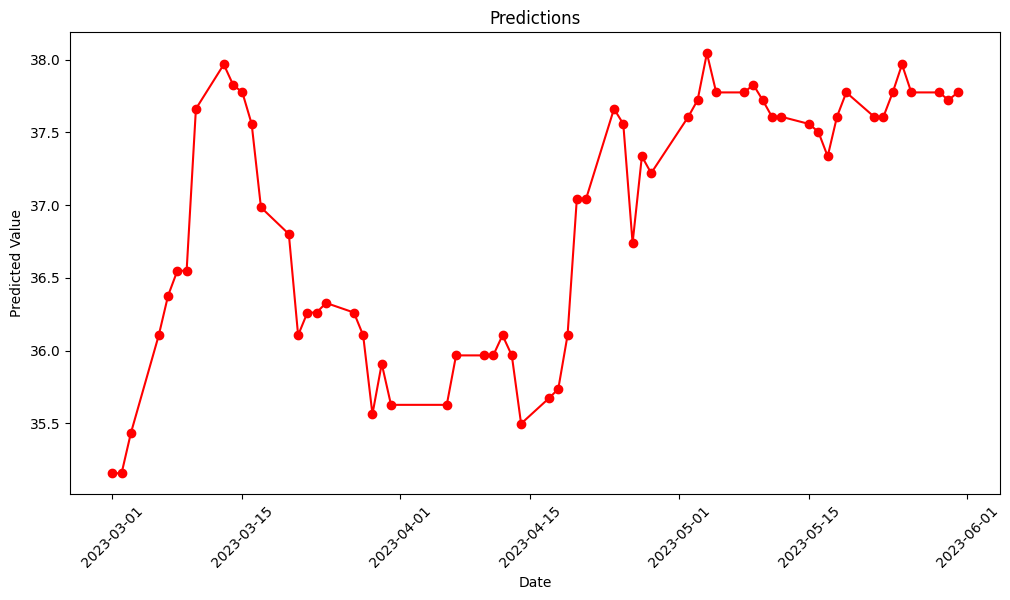

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



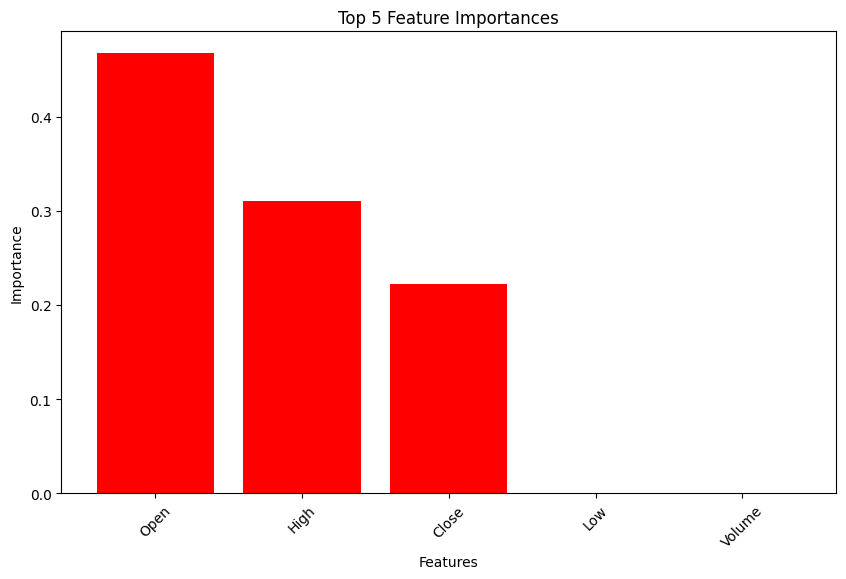

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


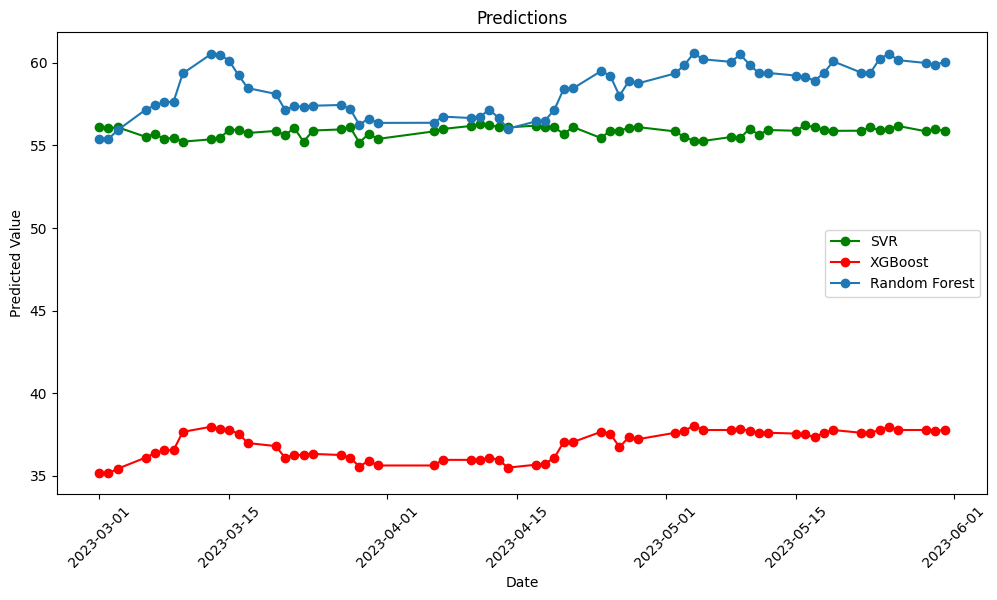

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
